# Training Neural Net

## Outcome

In [2]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.12 64bit [GCC 5.4.0 20160609]
IPython 5.4.1
OS Linux 4.10.0 28 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.3
Sat Jul 29 15:58:04 2017 AEST

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import glob
import copy
import random
import pandas as pd

import os
import sys

sys.path.append("../src")
from images_permute import processing_pipeline

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

In [4]:
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
    
model = load_model('model.h5')

Using TensorFlow backend.


In [5]:
list_image_directory_paths = glob.glob('/home/jack/Data/merged_sorted/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/home/jack/Data/merged_sorted/Queen/', 62)


In [6]:
class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    class_images_dict[image_class_name] = []
    
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        class_images_dict[image_class_name].append(image)

('Queen', '/home/jack/Data/merged_sorted/Queen/')
('TT', '/home/jack/Data/merged_sorted/TT/')
('Trident', '/home/jack/Data/merged_sorted/Trident/')
('w', '/home/jack/Data/merged_sorted/w/')
('5', '/home/jack/Data/merged_sorted/5/')
('e', '/home/jack/Data/merged_sorted/e/')
('Power', '/home/jack/Data/merged_sorted/Power/')
('Peace', '/home/jack/Data/merged_sorted/Peace/')
('1', '/home/jack/Data/merged_sorted/1/')
('EE', '/home/jack/Data/merged_sorted/EE/')
('Pillars', '/home/jack/Data/merged_sorted/Pillars/')
('ZZ', '/home/jack/Data/merged_sorted/ZZ/')
('h', '/home/jack/Data/merged_sorted/h/')
('Note1', '/home/jack/Data/merged_sorted/Note1/')
('Plane', '/home/jack/Data/merged_sorted/Plane/')
('Asterisk', '/home/jack/Data/merged_sorted/Asterisk/')
('Umbrella', '/home/jack/Data/merged_sorted/Umbrella/')
('arrowhollow', '/home/jack/Data/merged_sorted/arrowhollow/')
('a', '/home/jack/Data/merged_sorted/a/')
('RR', '/home/jack/Data/merged_sorted/RR/')
('6', '/home/jack/Data/merged_sorted/6/'

In [7]:
len(class_images_dict['AA'])

8118

In [8]:
def norm_image(image):
    image[image < 0] = 0
    image[image > 255] = 255
    return np.uint8(image)

def add_noise(image, n_or_u):
    noise = np.zeros((28,28), np.uint8)
    if n_or_u == 'n':
        cv2.randn(noise, 30, 2)
    else:
        cv2.randu(noise, 20, 2)
    noisy_image = np.uint32(image) + noise
    noisy_image[noisy_image < 0] = 0
    noisy_image[noisy_image > 255] = 255
    noisy_image = np.uint8(noisy_image)
    return noisy_image

def rotate_image(image):
    rotated_images = []
    for angle in range(90, 360, 90):
        M = cv2.getRotationMatrix2D((14,14),angle,1)
        r = cv2.warpAffine(image,M,(28,28))
        rotated_images.append(r)
    return rotated_images

def change_brightness_contrast(image):
    image_int32 = np.int32(image)
    increase_brightness = norm_image(image_int32 + 80)
    decrease_brightness = norm_image(image_int32 - 80)
    return [increase_brightness, decrease_brightness]
    
def occlude_edges(image):
    full_size = np.zeros((28, 28), dtype=np.uint8)
    full_size[2:26, 2:26] = image[2:26, 2:26]
    return full_size

def mean_smooth(image):
    mean_smoothed = cv2.blur(image, (3, 3))
    return mean_smoothed

def rotate_image_modifications(image):
    rotated_images = []
    for angle in range(90, 360, 90):
        M = cv2.getRotationMatrix2D((14,14),angle,1)
        r = cv2.warpAffine(image,M,(28,28))
        rotated_images.append(r)
    
    rotated_images[0] = add_noise(occlude_edges(rotated_images[0]), 'u')
    rotated_images[1] = norm_image(np.int32(rotated_images[1]) + 80)
    rotated_images[2] = norm_image(np.int32(rotated_images[2]) - 80)
    
    return rotated_images

In [9]:
images_list = []
image_class_names_index = 0
image_class_names = {}
y = []

for tag_class in class_images_dict.keys():
    print(tag_class, len(class_images_dict[tag_class]))
    image_class_names[image_class_names_index] = tag_class
    for tag in class_images_dict[tag_class]:
        #generated_images = [tag]
        #generated_images.extend(change_brightness_contrast(tag))
        #generated_images.extend(rotate_image(tag))
        #generated_images.extend(rotate_image_modifications(tag))
        #X.extend(generated_images)
        images_list.append(tag)
        #X.append(tag)
        #y.extend([image_class_names_index] * len(generated_images))
        y.append(image_class_names_index)
    image_class_names_index += 1
    


X = np.array(images_list)
y = np.array(y)

('CircleLine', 21979)
('heart', 31483)
('Note1', 11372)
('DD', 18544)
('Peace', 20233)
('Question', 11864)
('Pillars', 46566)
('HH', 10322)
('Ampersand', 52180)
('radioactive', 56492)
('PP', 28598)
('Umbrella', 7119)
('RR', 10427)
('Ankh', 24155)
('sun', 9234)
('TT', 5412)
('Trident', 38171)
('Asterisk', 26175)
('4', 29191)
('1', 25417)
('0', 49403)
('3', 50449)
('Plane', 13622)
('5', 33364)
('arrowhollow', 12206)
('7', 26233)
('6', 22919)
('8', 50096)
('Omega', 35036)
('CircleCross', 24111)
('AA', 8118)
('SS', 27285)
('Note2', 5740)
('hash', 12738)
('EE', 16548)
('UU', 26626)
('Plant', 15522)
('lines3', 14093)
('nn', 9380)
('GG', 12529)
('necklace', 15115)
('XX', 48148)
('ZZ', 40500)
('Triangle', 39294)
('Dot', 14171)
('a', 29950)
('e', 35868)
('Power', 36941)
('KK', 39608)
('h', 26713)
('Queen', 11149)
('Tadpole', 18322)
('MM', 37633)
('2', 24018)
('r', 21290)
('ArrowLine', 18905)
('circlehalf', 21826)
('w', 25506)
('unknown', 30154)
('y', 29240)
('Scissors', 23398)
('leaf', 10602)


In [10]:
print(X.shape, y.shape)
print(set(y))
print(image_class_names[1])

((1549303, 28, 28), (1549303,))
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])
heart


In [11]:
Y = np_utils.to_categorical(y, len(set(y)))

In [12]:
img_rows = 28
img_cols = 28

if K.image_dim_ordering() == 'th':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)

X.shape

(1549303, 28, 28, 1)

In [13]:
X = X.astype('float32')
X /= 255

In [14]:
pc = model.predict_classes(X)
pc

1548608/1549303 [============================>.] - ETA: 0s

array([ 0,  0,  0, ..., 61, 61, 61])

DD
DD


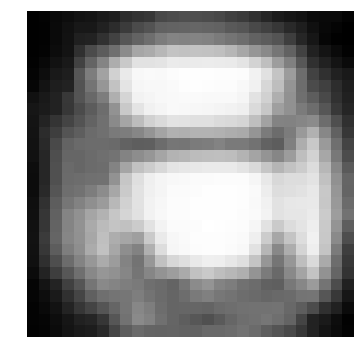

In [15]:
#view(X[70000].reshape(1, 28, 28)[0])
view(images_list[70000])
print(image_class_names[pc[70000]])
print(image_class_names[y[70000]])

In [16]:
def create_dir_check_exists(dir_path, new_dir):
    new_directory = os.path.join(dir_path, new_dir)
    if not os.path.exists(new_directory):
        os.makedirs(new_directory)
    return new_directory

In [17]:
image_class_names.items()

[(0, 'CircleLine'),
 (1, 'heart'),
 (2, 'Note1'),
 (3, 'DD'),
 (4, 'Peace'),
 (5, 'Question'),
 (6, 'Pillars'),
 (7, 'HH'),
 (8, 'Ampersand'),
 (9, 'radioactive'),
 (10, 'PP'),
 (11, 'Umbrella'),
 (12, 'RR'),
 (13, 'Ankh'),
 (14, 'sun'),
 (15, 'TT'),
 (16, 'Trident'),
 (17, 'Asterisk'),
 (18, '4'),
 (19, '1'),
 (20, '0'),
 (21, '3'),
 (22, 'Plane'),
 (23, '5'),
 (24, 'arrowhollow'),
 (25, '7'),
 (26, '6'),
 (27, '8'),
 (28, 'Omega'),
 (29, 'CircleCross'),
 (30, 'AA'),
 (31, 'SS'),
 (32, 'Note2'),
 (33, 'hash'),
 (34, 'EE'),
 (35, 'UU'),
 (36, 'Plant'),
 (37, 'lines3'),
 (38, 'nn'),
 (39, 'GG'),
 (40, 'necklace'),
 (41, 'XX'),
 (42, 'ZZ'),
 (43, 'Triangle'),
 (44, 'Dot'),
 (45, 'a'),
 (46, 'e'),
 (47, 'Power'),
 (48, 'KK'),
 (49, 'h'),
 (50, 'Queen'),
 (51, 'Tadpole'),
 (52, 'MM'),
 (53, '2'),
 (54, 'r'),
 (55, 'ArrowLine'),
 (56, 'circlehalf'),
 (57, 'w'),
 (58, 'unknown'),
 (59, 'y'),
 (60, 'Scissors'),
 (61, 'leaf')]

In [18]:
new_image_dir = '/home/jack/Dev/phd-notebooks/beeunique/predictions'
num = 0

for i, im in enumerate(images_list):
    num += 1
    predicted_class = image_class_names[pc[i]]
    real_class = image_class_names[y[i]]
    
    tag_class_dir = create_dir_check_exists(new_image_dir, real_class)
    
    if predicted_class == real_class or predicted_class == 'unknown':
        pred_dir = create_dir_check_exists(tag_class_dir, predicted_class)
        output_tag_image_path = os.path.join(pred_dir, str(num) + '.png')
        cv2.imwrite(output_tag_image_path, im)
    else:
        pred_dir = create_dir_check_exists(tag_class_dir, 'other')
        output_tag_image_path = os.path.join(pred_dir, str(num) + '.png')
        cv2.imwrite(output_tag_image_path, im)